In [67]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [1]:
# 경로 변수 (고정)

dataLoc = '../_data/'

trainfile = 'train_03_997.csv'
old_trainfile = 'train.csv'
kaggle_trainfile = 'train_k.csv'

testfile = 'test_clean.csv'
old_testfile = 'test.csv'

train_171016 = '171016_dow_hr_pas_L2_dur_only.csv'
train_osrm = '../_data/train_with_osrm.csv'
train_osrm_weather = '../_data/train_with_osrm_and_weather.csv'
train_osrm_weather_hourly = '../_data/train_with_osrm_and_weather_hourly.csv'
train_dropped_nan_fixed = '../_data/train__dropped__no_disaster_nan_fixed.csv'
train_added_airps = '../_data/train__dropped__lnglat_saved__airports__no_disaster.csv'
train_added_airps_cleaned = '../_data/train__dropped__cleaned__airports__no_disaster.csv'
train_added_airps_disas_cleaned = '../_data/train__dropped__cleaned__eval__airports__disaster.csv'
train_added_weekhr = 'train__dropped__cleaned__eval__a_d_weekhour.csv'
train_added_manh = '../_data/train__dropped__air_bliz_weekhr_manh.csv'
train_all_vars_rough = '../_data/train__all_vars__rough.csv'

train_701778_all_vars = '../_data/train__701778__all_vars.csv'
train_700806_all_vars_cooks_dropped = '../_data/train_700806_dropped_cooks.csv'
train_700789_all_vars_cooks_dropped_circle_filter = 'train_700789_dropped_cooks__circle_filter.csv'

train_latest = train_700789_all_vars_cooks_dropped_circle_filter

In [2]:
pd.options.display.max_columns = 40

```
attempt k-means
```

In [4]:
# train_with_osrm_and_weather.csv
df_train = pd.read_csv(dataLoc + train_latest)
df_train.head()

,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,...,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [6]:
df_train.head()


,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [7]:
df_copy = df_train.copy()

In [8]:
df_copy.insert(16, 'avg_spd', df_copy['total_dist'] / df_copy['dur'])

In [10]:
df_copy['avg_spd'] = 3.6 * df_copy['avg_spd']
df_copy.head()

,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [12]:
df_copy.drop(df_copy.loc[df_copy['avg_spd'] > 150, 'avg_spd'].index, inplace=True)

In [13]:
df_copy.shape

(700419, 31)

In [14]:
df_copy.to_csv('../_data/train_700419_cooks_circle_150kmh__no_clust.csv')

In [3]:
train_latest = '../_data/train_700419_cooks_circle_150kmh__no_clust.csv'

In [4]:
# train_with_osrm_and_weather.csv
df_train = pd.read_csv(dataLoc + train_latest,\
                       usecols=['p_lng', 'p_lat', 'd_lng', 'd_lat'])
df_train.head()

,p_lng,p_lat,d_lng,d_lat
0,-73.987793,40.724792,-73.975616,40.656445
1,-73.957596,40.717770,-73.951424,40.775230
2,-74.000954,40.742031,-73.947708,40.782200
3,-73.985733,40.738258,-73.993179,40.754890
4,-74.006615,40.740650,-73.985619,40.723362


In [24]:
df_train.loc[(31 < df_train['d_lat'])\
             &(df_train['d_lat'] < 40), :]

,p_lng,p_lat,d_lng,d_lat


In [25]:
df_train.loc[(31 < df_train['p_lat'])\
             &(df_train['p_lat'] < 40), :]

,p_lng,p_lat,d_lng,d_lat


In [17]:
for col in df_train.columns:
    print(col)
    print(" min = {}".format(np.percentile(df_train[col], 0)))
    print(" 0.3 = {}".format(np.percentile(df_train[col], 0.3)))
    print("99.7 = {}".format(np.percentile(df_train[col], 99.7)))
    print(" max = {}".format(np.percentile(df_train[col], 100)))

p_lng
 min = -75.24149323
 0.3 = -74.01612091
99.7 = -73.7767868
 max = -73.22267914
p_lat
 min = 40.22580338
 0.3 = 40.64365483774
99.7 = 40.823104793960006
 max = 41.69679642
d_lng
 min = -75.57015228
 0.3 = -74.03272816197999
99.7 = -73.77881634208
 max = -72.71139526
d_lat
 min = 40.22579956
 0.3 = 40.630800463599996
99.7 = 40.86590764198
 max = 41.69335175


In [5]:
df_copy = df_train.copy()

In [6]:
df_copy[['p_lat', 'p_lng']]

,p_lat,p_lng
0,40.724792,-73.987793
1,40.717770,-73.957596
2,40.742031,-74.000954
3,40.738258,-73.985733
4,40.740650,-74.006615
5,40.719234,-73.997253
6,40.753037,-73.994537
7,40.774086,-73.873055
8,40.780540,-73.980354
9,40.644691,-73.782448


## KMeans (n=60) pickup

In [7]:
pickup_coords = df_copy[['p_lat', 'p_lng']].copy()

In [8]:
from sklearn.cluster import KMeans
from datetime import datetime

t0 = datetime.now()
print(t0)

pickup_coords = df_copy[['p_lat', 'p_lng']].copy()
kmeans = KMeans(n_clusters=60)

kmeans.fit(pickup_coords)

y_kmeans = kmeans.predict(pickup_coords)

t1 = datetime.now()

print(t1-t0)

2017-10-23 14:24:50.167532
0:05:46.970010


In [45]:
(40.896-40.598)*1.6+-74.09

-73.6132

In [2]:
df_y = pd.read_csv('../_data/kmeans_30_backup.csv')

C:\Users\jchoi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
yd = df_y.iloc[1:, 0].copy()
yd.head()

1    16
2    17
3    17
4    19
5    26
Name: 30, dtype: object

In [7]:
yd.rename('d')

1         16
2         17
3         17
4         19
5         26
6         19
7         12
8          0
9         18
10        29
11         6
12         0
13         0
14        26
15        17
16        20
17         7
18         0
19        14
20         3
21         7
22         6
23        26
24        21
25        13
26        20
27        20
28        29
29        17
30        26
          ..
700760    11
700761     0
700762     5
700763    26
700764    20
700765     5
700766    11
700767     3
700768    22
700769    21
700770    17
700771    17
700772     3
700773    26
700774    14
700775    17
700776    21
700777     1
700778    20
700779    12
700780    21
700781     0
700782     7
700783     5
700784     7
700785    19
700786     7
700787    11
700788    18
700789     3
Name: d, Length: 700789, dtype: object

In [8]:
yp = df_y.iloc[1:, 1].copy()
yp.rename('p')
yp.head()

1    14
2    17
3     1
4    28
5     1
Name: 30.1, dtype: object

In [10]:
from datetime import datetime

In [19]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          

In [12]:
yp = y_kmeans.copy()

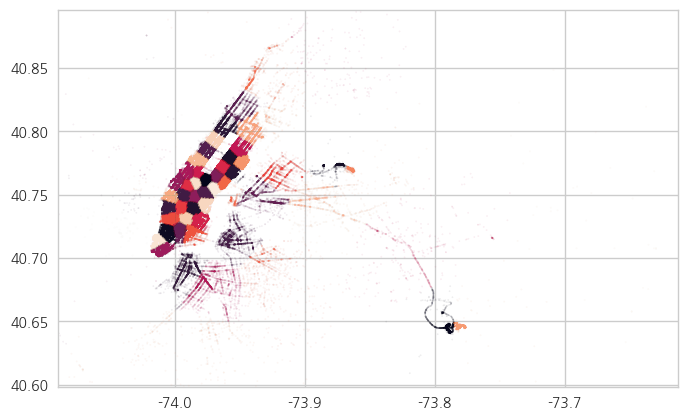

0:00:17.918153


In [13]:
t0 = datetime.now()


plt.scatter(pickup_coords.iloc[:, 1], pickup_coords.iloc[:, 0],\
            c=yp, s=1, alpha=0.05)

plt.xlim(-74.090, -73.613)
plt.ylim(40.598, 40.896)

plt.show()


t1 = datetime.now()
print(t1-t0)

In [56]:
y_dict = dict()
y_dict[(30, 'p')] = y_kmeans

In [76]:
y_dict[(30, 'd')] = y_kmeans

In [14]:
ylist = [yp]

In [15]:
ylist

[array([38, 11,  9, ..., 59, 38, 21])]

In [79]:
df_y = pd.DataFrame(y_dict)
df_y.shape

(700789, 2)

In [80]:
df_y.to_csv('../_data/kmeans_30_backup.csv', index=False)

## KMeans (n=60) dropoff

In [16]:
dropoff_coords = df_copy[['d_lat', 'd_lng']].copy()

In [17]:
from sklearn.cluster import KMeans
from datetime import datetime

t0 = datetime.now()
print(t0)

dropoff_coords = df_copy[['d_lat', 'd_lng']].copy()
kmeans = KMeans(n_clusters=60)

kmeans.fit(dropoff_coords)

y_kmeans = kmeans.predict(dropoff_coords)

t1 = datetime.now()

print(t1-t0)

2017-10-23 14:34:04.228790
0:06:26.785382


In [45]:
(40.896-40.598)*1.6+-74.09

-73.6132

In [18]:
y_kmeans[:5]

array([11, 20,  2, 34, 50])

In [19]:
yd = y_kmeans.copy()

In [25]:
df_y = pd.concat([pd.Series(yp), pd.Series(yd)], axis=1)
df_y.head()

,0,1
0,38,11
1,11,20
2,9,2
3,5,34
4,9,50


In [26]:
df_y.to_csv('../_data/kmeans_60_backup.csv', index=False)


2017-10-23 14:43:53.790617


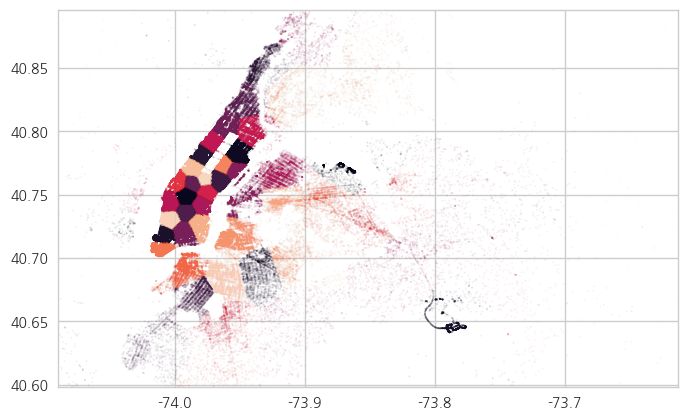

0:00:18.008930


In [27]:
t0 = datetime.now()
print(t0)

plt.scatter(dropoff_coords.iloc[:, 1], dropoff_coords.iloc[:, 0],\
            c=yd, s=1, alpha=0.05)

plt.xlim(-74.090, -73.613)
plt.ylim(40.598, 40.896)

plt.show()


t1 = datetime.now()
print(t1-t0)

In [49]:
y_dict = dict()
y_dict[30] = y_kmeans

In [30]:
df_train = pd.read_csv('../_data/train_700419_cooks_circle_150kmh__no_clust.csv')

df_train.head()

,Unnamed: 0,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0,False,0,430,Saturday,23,143,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,1,False,0,430,Saturday,23,143,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,2,False,0,430,Saturday,23,143,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,3,False,0,430,Saturday,23,143,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,4,False,0,430,Saturday,23,143,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [31]:
del df_train['Unnamed: 0']

In [32]:
df_train.to_csv('../_data/train_700419_cooks_circle_150kmh__no_clust.csv', index=False)

In [34]:
yps = pd.Series(yp)
yds = pd.Series(yd)

In [47]:

yp.index=range(len(yp))
yd.index=range(len(yd))

In [46]:
yp.head()

0    14
1    17
2     1
3    28
4     1
Name: 30.1, dtype: object

In [35]:
pd.options.display.max_columns = 40

In [36]:
df_train.head()

,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [37]:
df_train.insert(6, 'p_clust_60', yp)
df_train.insert(7, 'd_clust_60', yd)

df_train.head()

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust_60,d_clust_60,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,38,11,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,11,20,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,9,2,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,5,34,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,9,50,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [38]:
df_train.isnull().sum()

is_hol           0
blizz            0
m_d              0
dow              0
hr               0
wkhr             0
p_clust_60       0
d_clust_60       0
L2               0
pas_cnt          0
p_JFK            0
p_LGA            0
d_JFK            0
d_LGA            0
p_lng            0
p_lat            0
d_lng            0
d_lat            0
avg_spd          0
total_dist       0
total_time       0
day_max_temp     0
day_min_temp     0
day_rainfall     0
day_snowfall     0
day_snowdepth    0
hr_temp          0
hr_humid         0
hr_dewpt         0
hr_windspeed     0
hr_gustspeed     0
hr_precip        0
dur              0
dtype: int64

In [39]:
df_train.columns

Index(['is_hol', 'blizz', 'm_d', 'dow', 'hr', 'wkhr', 'p_clust_60',
       'd_clust_60', 'L2', 'pas_cnt', 'p_JFK', 'p_LGA', 'd_JFK', 'd_LGA',
       'p_lng', 'p_lat', 'd_lng', 'd_lat', 'avg_spd', 'total_dist',
       'total_time', 'day_max_temp', 'day_min_temp', 'day_rainfall',
       'day_snowfall', 'day_snowdepth', 'hr_temp', 'hr_humid', 'hr_dewpt',
       'hr_windspeed', 'hr_gustspeed', 'hr_precip', 'dur'],
      dtype='object')

In [57]:
df_train['p_clust']

0         14
1         17
2          1
3         28
4          1
5         23
6         24
7          4
8         16
9          2
10        23
11        27
12        10
13         1
14         3
15         0
16        24
17         3
18        29
19        22
20        27
21        23
22        23
23         8
24        25
25        27
26         0
27        23
28        15
29         6
          ..
700759    14
700760    24
700761     8
700762     4
700763    28
700764     0
700765    21
700766    23
700767    22
700768    14
700769    16
700770    24
700771    17
700772    24
700773     6
700774    24
700775    15
700776    28
700777    28
700778    22
700779     8
700780    28
700781    28
700782     8
700783    24
700784    21
700785     9
700786     8
700787    14
700788     5
Name: p_clust, Length: 700789, dtype: object

In [40]:
df_train.to_csv('../_data/train_kmeans_60_added_cooksd_circle_150kmh.csv', index=False)

In [61]:
df_train = pd.read_csv('../_data/train_kmeans_30_added.csv')
df_train.head()

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,14,16,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,17,17,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,1,17,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,28,19,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,1,26,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [41]:
t0 = datetime.now()


fmla = 'dur ~ C(is_hol) + C(dow):C(hr) + C(p_clust_60) + C(d_clust_60)\
+ scale(total_dist) - 1'

model_simple = sm.OLS.from_formula(fmla, data=df_train)
res_simple = model_simple.fit()

t1 = datetime.now()

print(t1-t0)

0:00:52.157723


0.674? 30 clusts?

In [42]:
res_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     5205.
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:51:34   Log-Likelihood:            -5.1080e+06
No. Observations:              700419   AIC:                         1.022e+07
Df Residuals:                  700132   BIC:                         1.022e+07
Df Model:                         286                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(is_hol)[False]                519.4507      7.113     73.026      0.000     505.509     533.392
C(is_hol)[True]                 398.7343      7.627     52.282      0.000     383.787     413.682
C(p_clust_60)[T.1]             -610.0496      5.665   -107.690      0.000    -621.153    -598.947
C(p_clust_60)[T.2]              -24.3594      3.713     -6.561      0.000     -31.637     -17.082
C(p_clust_60)[T.3]             -240.8761      4.357    -55.291      0.000    -249.415    -232.337
C(p_clust_60)[T.4]              -60.7625      3.376    -18.000      0.000     -67.379     -54.146
C(p_clust_60)[T.5]              -31.8088      3.244     -9.807      0.000     -38.166     -25.451
C(p_clust_60)[T.6]              -65.5561      3.509    -18.680      0.000     -72.435     -58.678
C(p_clust_60)[T.7]              -23.7031      4.650     -5.098      0.000     -32.816     -14.590
C(p_clust_60)[T.8]             -145.0191      6.210    -23.353      0.000    -157.190    -132.848
C(p_clust_60)[T.9]               12.4608      3.375      3.692      0.000       5.846      19.076
C(p_clust_60)[T.10]               6.4253      3.025      2.124      0.034       0.496      12.355
C(p_clust_60)[T.11]             -98.3647      6.423    -15.313      0.000    -110.954     -85.775
C(p_clust_60)[T.12]             -53.2633      3.003    -17.738      0.000     -59.149     -47.378
C(p_clust_60)[T.13]             -57.7711      3.529    -16.372      0.000     -64.687     -50.855
C(p_clust_60)[T.14]               1.0163      6.867      0.148      0.882     -12.442      14.475
C(p_clust_60)[T.15]            -107.1705      7.019    -15.269      0.000    -120.927     -93.414
C(p_clust_60)[T.16]              10.7674      3.481      3.093      0.002       3.944      17.591
C(p_clust_60)[T.17]             745.9601    197.670      3.774      0.000     358.534    1133.386
C(p_clust_60)[T.18]             795.7300     33.833     23.520      0.000     729.419     862.041
C(p_clust_60)[T.19]             -67.7152      3.254    -20.811      0.000     -74.092     -61.338
C(p_clust_60)[T.20]            1508.0271     80.968     18.625      0.000    1349.332    1666.722
C(p_clust_60)[T.21]             -57.0069      3.186    -17.891      0.000     -63.252     -50.762
C(p_clust_60)[T.22]             -53.9484      4.221    -12.782      0.000     -62.221     -45.676
C(p_clust_60)[T.23]             -95.4850      3.991    -23.927      0.000    -103.307     -87.663
C(p_clust_60)[T.24]            2540.6325    111.770     22.731      0.000    2321.567    2759.698
C(p_clust_60)[T.25]             -55.0889      4.021    -13.699      0.000     -62.971     -47.207
C(p_clust_60)[T.26]            -132.8081      7.068    -18.789      0.000    -146.662    -118.955
C(p_clust_60)[T.27]             387.1779     

In [73]:
sm.stats.anova_lm(res_simple, typ=2)

,sum_sq,df,F,PR(>F)
C(is_hol),1.544419e+09,2.0,5994.735344,0.0
C(p_clust),3.343855e+09,29.0,895.126089,0.0
C(d_clust),5.898891e+09,29.0,1579.090991,0.0
C(dow):C(hr),1.283217e+10,167.0,596.511072,0.0
scale(total_dist),9.119330e+10,1.0,707941.994596,0.0
Residual,9.024252e+10,700561.0,NaN,NaN


In [65]:
t0 = datetime.now()


fmla = 'dur ~ C(is_hol) + C(dow):C(hr) + C(p_clust)*C(d_clust)\
+ scale(total_dist) - 1'

model_c = sm.OLS.from_formula(fmla, data=df_train)
res_c = model_c.fit()

t1 = datetime.now()

print(t1-t0)

0:07:24.145128


In [66]:
res_c.summary()

C:\Users\jchoi\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\jchoi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jchoi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jchoi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     2013.
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        00:06:37   Log-Likelihood:            -5.0636e+06
No. Observations:              700789   AIC:                         1.013e+07
Df Residuals:                  699892   BIC:                         1.014e+07
Df Model:                         896                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(is_hol)[False]                    923.2463     14.497     63.686      0.000     894.833     951.660
C(is_hol)[True]                     802.7576     14.722     54.526      0.000     773.902     831.613
C(p_clust)[T.1]                    -373.9710     14.427    -25.921      0.000    -402.248    -345.694
C(p_clust)[T.2]                    -881.2385     21.856    -40.320      0.000    -924.076    -838.401
C(p_clust)[T.3]                    -116.4167     15.244     -7.637      0.000    -146.294     -86.539
C(p_clust)[T.4]                    -282.7955     19.622    -14.412      0.000    -321.254    -244.336
C(p_clust)[T.5]                    -242.7475     14.803    -16.398      0.000    -271.761    -213.734
C(p_clust)[T.6]                    -368.3916     14.476    -25.448      0.000    -396.764    -340.019
C(p_clust)[T.7]                      14.5803    111.744      0.130      0.896    -204.433     233.594
C(p_clust)[T.8]                      19.1358     15.557      1.230      0.219     -11.356      49.627
C(p_clust)[T.9]                    -189.1833     21.632     -8.745      0.000    -231.582    -146.785
C(p_clust)[T.10]                   -351.0409     15.356    -22.860      0.000    -381.138    -320.944
C(p_clust)[T.11]                     99.2971     41.741      2.379      0.017      17.486     181.108
C(p_clust)[T.12]                   -709.1097     81.842     -8.664      0.000    -869.518    -548.702
C(p_clust)[T.13]                   -401.8985     95.261     -4.219      0.000    -588.606    -215.190
C(p_clust)[T.14]                   -139.4618     15.233     -9.155      0.000    -169.319    -109.605
C(p_clust)[T.15]                    122.0888     17.323      7.048      0.000      88.136     156.042
C(p_clust)[T.16]                    -90.1547     18.127     -4.973      0.000    -125.683     -54.626
C(p_clust)[T.17]                    242.2458     42.272      5.731      0.000     159.393     325.098
C(p_clust)[T.18]                   -200.0062     97.105     -2.060      0.039    -390.328      -9.684
C(p_clust)[T.19]                   1627.5383     67.479     24.119      0.000    1495.282    1759.795
C(p_clust)[T.20]                   -435.6429    118.272     -3.683      0.000    -667.453    -203.833
C(p_clust)[T.21]                   -113.4927     14.993     -7.570      0.000    -142.879     -84.107
C(p_clust)[T.22]                    -96.9417     29.068     -3.335      0.001    -153.914     -39.969
C(p_clust)[T.23]                   -132.4536     14.919     -8.878      0.000    -161.695    -103.212
C(p_clust)[T.24]                   -388.9847     14.473    -26.876      0.000    -417.352    -360.617
C(p_clust)[T.25]                   -230.7219     33.246     -6.940      0.000    -295.883    -165.560
C(p_clust)[T.26]       

In [64]:
res_p = res_c
res_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     6662.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:58:36   Log-Likelihood:            -5.1392e+06
No. Observations:              700789   AIC:                         1.028e+07
Df Residuals:                  700590   BIC:                         1.028e+07
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(is_hol)[False]                612.2825      5.995    102.136      0.000     600.533     624.032
C(is_hol)[True]                 493.7349      6.639     74.374      0.000     480.724     506.746
C(p_clust)[T.1]                 122.2941      2.717     45.005      0.000     116.968     127.620
C(p_clust)[T.2]                -300.8333      4.117    -73.075      0.000    -308.902    -292.765
C(p_clust)[T.3]                  97.0401      2.495     38.895      0.000      92.150     101.930
C(p_clust)[T.4]                  14.0903      3.463      4.069      0.000       7.303      20.877
C(p_clust)[T.5]                  61.8305      2.568     24.080      0.000      56.798      66.863
C(p_clust)[T.6]                 125.2914      2.767     45.275      0.000     119.868     130.715
C(p_clust)[T.7]                 148.9345     11.670     12.763      0.000     126.063     171.807
C(p_clust)[T.8]                  50.3082      2.395     21.007      0.000      45.614      55.002
C(p_clust)[T.9]                  -1.7489      3.161     -0.553      0.580      -7.944       4.446
C(p_clust)[T.10]                 70.9863      3.325     21.352      0.000      64.470      77.502
C(p_clust)[T.11]                 56.6625      5.201     10.895      0.000      46.469      66.856
C(p_clust)[T.12]                 -2.8581     10.413     -0.274      0.784     -23.268      17.552
C(p_clust)[T.13]               -246.4481     36.734     -6.709      0.000    -318.446    -174.450
C(p_clust)[T.14]                116.3223      2.862     40.638      0.000     110.712     121.932
C(p_clust)[T.15]                 32.1584      2.479     12.974      0.000      27.300      37.016
C(p_clust)[T.16]                 22.7055      2.777      8.175      0.000      17.262      28.149
C(p_clust)[T.17]                140.4605      5.725     24.533      0.000     129.239     151.682
C(p_clust)[T.18]                 51.4874     15.245      3.377      0.001      21.607      81.368
C(p_clust)[T.19]                 18.5706     72.686      0.255      0.798    -123.891     161.032
C(p_clust)[T.20]               -261.5941     63.568     -4.115      0.000    -386.185    -137.003
C(p_clust)[T.21]                 76.5402      2.442     31.342      0.000      71.754      81.327
C(p_clust)[T.22]                 69.4622      4.967     13.986      0.000      59.728      79.197
C(p_clust)[T.23]                148.3290      2.745     54.031      0.000     142.948     153.710
C(p_clust)[T.24]                118.7040      2.504     47.411      0.000     113.797     123.611
C(p_clust)[T.25]                  2.0456      4.292      0.477      0.634      -6.367      10.458
C(p_clust)[T.26]                288.9441    370.485      0.780      0.435    -437.195    1015.083
C(p_clust)[T.27]                 98.7943     

In [62]:
df_dropped['dur'].sort_values(ascending=False)

460097    3526282
682215    2227612
460154    2049578
682482    1939736
608922      86369
316284      86366
126987      86364
498904      86364
203911      86362
355294      86362
49235       86360
47993       86358
411484      86358
485768      86357
377160      86357
991         86356
610941      86356
583168      86356
152055      86354
81787       86354
684086      86354
699197      86353
41224       86353
622087      86352
456425      86352
428877      86351
397182      86349
244366      86347
680950      86346
347460      86346
           ...   
37813       37305
511734      36949
600284      34920
427918      34916
552062      34014
568753      32338
356400      31751
684845      31099
336428      30291
640859      30062
669308      30018
195124      28575
669144      28241
517082      27217
91075       27064
433609      27047
2617        26722
66558       26577
462335      26396
324327      25713
568259      24351
368341      23440
8862        23096
109337      22012
538019    

In [48]:
df_copy2.shape

(700806, 30)

In [73]:
df_copy2.to_csv('../_data/train_700806_dropped_cooks.csv', index=False)

In [71]:
t0 = datetime.now()
modelz = sm.OLS.from_formula(fmla, df_copy2)
resz = modelz.fit()
print('done')
t1 = datetime.now()
print(t1-t0)

done
0:00:34.182396


```
adj rsq = 0.643
AIC ~ 1E7
Cond = 76.2
```

In [72]:
resz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dur   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     7462.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:05:37   Log-Likelihood:            -5.1496e+06
No. Observations:              700806   AIC:                         1.030e+07
Df Residuals:                  700636   BIC:                         1.030e+07
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(is_hol)[False]                699.1268      5.791    120.725      0.000     687.776     710.477
C(is_hol)[True]                 581.1905      6.472     89.797      0.000     568.505     593.876
C(hr)[T.1]                      -17.8175      9.133     -1.951      0.051     -35.719       0.084
C(hr)[T.2]                      -44.9929     10.214     -4.405      0.000     -65.012     -24.974
C(hr)[T.3]                      -55.5377     11.291     -4.919      0.000     -77.668     -33.408
C(hr)[T.4]                     -113.0417     12.550     -9.007      0.000    -137.640     -88.443
C(hr)[T.5]                     -220.5159     12.317    -17.903      0.000    -244.657    -196.375
C(hr)[T.6]                     -102.4339      9.237    -11.089      0.000    -120.539     -84.329
C(hr)[T.7]                       69.1176      7.903      8.746      0.000      53.628      84.607
C(hr)[T.8]                      201.3768      7.681     26.218      0.000     186.323     216.431
C(hr)[T.9]                      233.3335      7.778     30.000      0.000     218.089     248.578
C(hr)[T.10]                     232.4770      7.991     29.093      0.000     216.815     248.139
C(hr)[T.11]                     237.0367      7.940     29.852      0.000     221.474     252.600
C(hr)[T.12]                     221.2699      7.826     28.274      0.000     205.931     236.608
C(hr)[T.13]                     185.0435      7.822     23.656      0.000     169.712     200.375
C(hr)[T.14]                     238.5610      7.679     31.068      0.000     223.511     253.611
C(hr)[T.15]                     294.3145      7.793     37.767      0.000     279.041     309.588
C(hr)[T.16]                     271.5205      8.040     33.771      0.000     255.762     287.279
C(hr)[T.17]                     242.0371      7.655     31.619      0.000     227.034     257.040
C(hr)[T.18]                     202.6808      7.336     27.627      0.000     188.302     217.060
C(hr)[T.19]                     157.9105      7.281     21.687      0.000     143.639     172.182
C(hr)[T.20]                     114.2240      7.413     15.409      0.000      99.695     128.753
C(hr)[T.21]                      96.4639      7.451     12.946      0.000      81.860     111.068
C(hr)[T.22]                     121.1905      7.397     16.383      0.000     106.692     135.689
C(hr)[T.23]                     117.8986      7.414     15.902      0.000     103.368     132.430
C(dow)[T.Monday]:C(hr)[0]      -152.2822     10.189    -14.945      0.000    -172.253    -132.311
C(dow)[T.Saturday]:C(hr)[0]      72.0354      7.559      9.529      0.000      57.219      86.851
C(dow)[T.Sunday]:C(hr)[0]        70.0227      7.609      9.202      0.000      55.109      84.937
C(dow)[T.Thursday]:C(hr)[0]     -72.5029     